### Univariate Linear regression (advertising.csv)

#### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### getting data set

In [2]:
df = pd.read_csv('datasets/Advertising.csv', index_col = 0)
cols = list(df.columns[:-1])
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#print(type(X))
# print(cols)
#print(df)

#### splitting the data set into train and test (70/30)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

#### training SLR model on training set

In [4]:
from sklearn.linear_model import LinearRegression


def trainModel(X, y, regressor):

    B0 = {}
    B1 = {}
    for i in range(3):
        
        x = X[:,i].reshape(-1, 1)
        regressor.fit(x, y)
        B0[cols[i]] = round(regressor.intercept_, 4)
        B1[cols[i]] = round(float(regressor.coef_), 4)
        print("intercept for {}: {}".format(cols[i], B0[cols[i]]))
        print("coefficient for {}: {}".format(cols[i], B1[cols[i]]))
    return (B0, B1)
    
    

In [5]:
regressor = LinearRegression()
B0, B1 = trainModel(X_train, y_train, regressor)
print(B0)
print(B1)


intercept for TV: 7.4442
coefficient for TV: 0.0449
intercept for Radio: 9.8024
coefficient for Radio: 0.1697
intercept for Newspaper: 13.0855
coefficient for Newspaper: 0.0268
{'TV': 7.4442, 'Radio': 9.8024, 'Newspaper': 13.0855}
{'TV': 0.0449, 'Radio': 0.1697, 'Newspaper': 0.0268}


#### using model to predict against the test data set

In [6]:
est_y = {}
for i in range(3):
    x = X_test[:, i].reshape(-1, 1).round(2)
    est_y[cols[i]] = regressor.predict(x).round(2)
#print("{} : {}".format(est_y['TV'], y_test))

#### visualising train data set

In [7]:

def plot_traindata(X_train, y_train, regressor):
    for i in range(3):
        plt.scatter(X_train[:,i] , y_train, color = 'red')
        plt.plot(X_train[:, i], regressor.predict(X_train[:, i].reshape(-1,1)), color='blue')
        plt.title('Sales v/s {}'.format(cols[i]))
        plt.xlabel('{}'.format(cols[i]))
        plt.ylabel("Sales")
        plt.show()

#### visualising train data set

In [8]:

def plot_testdata(X_test, y_test, regressor):    
    for i in range(3):
        plt.scatter(X_test[:,i] , y_test, color = 'yellow')
    #    plt.plot(X_train[:, i], regressor.predict(X_train[:, i].reshape(-1,1)), color='blue')
        plt.plot(X_test[:, i], est_y[cols[i]], color='green')
        plt.title('Sales v/s {}'.format(cols[i]))
        plt.xlabel('{}'.format(cols[i]))
        plt.ylabel("Sales")
        plt.show()

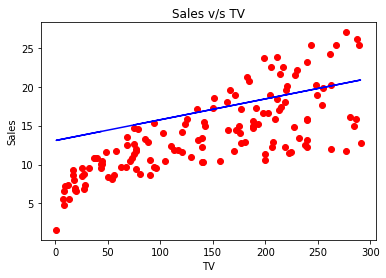

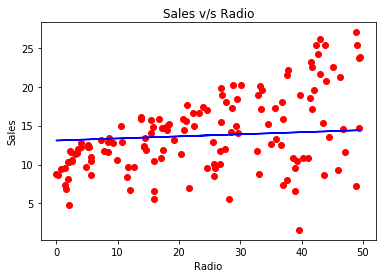

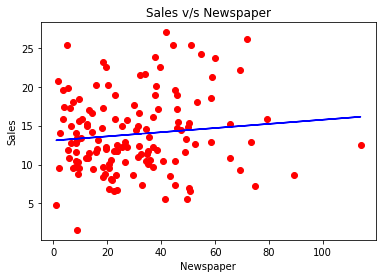

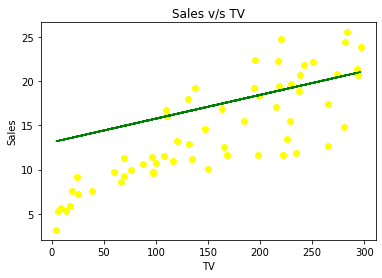

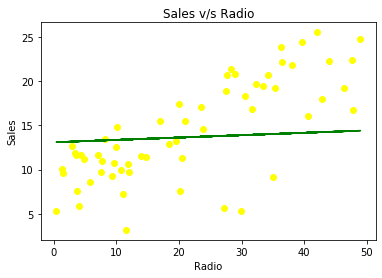

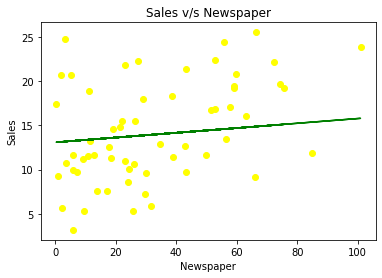

In [9]:
plot_traindata(X_train, y_train, regressor)
plot_testdata(X_test, y_test, regressor)

#### improving accuracy using gradient descent. 

In [10]:
a = 0.001
m_train = m = len(X_train)
m_test = len(X_test)

#### calculating hypothesis function: (hB(x))

In [11]:
def getHypothesisF(B0, B1, i):
    hB_x = (X_train[:, i]*B1 + B0).round(4)
    return hB_x

#### calculating cost function (J(B0, B1))

In [12]:

def getCostF(B0, B1, y, hB_x):
    err = (hB_x - y) 
    err2 = err**2
    err2_sum = sum(err2)
    J_B0_B1 = (err2_sum/(2*m)).round(4)
    return J_B0_B1

#### getting the initial hypothesis and cost function for training data

In [13]:
hB_x = {}
J_B0_B1 = {}
og_cost = {}
for i in range(len(cols)):
    hB_x[cols[i]] = getHypothesisF(B0[cols[i]], B1[cols[i]], i)
    J_B0_B1[cols[i]] = getCostF(B0[cols[i]], B1[cols[i]], y_train, hB_x[cols[i]])
    og_cost[cols[i]] = J_B0_B1[cols[i]]
print(J_B0_B1)

{'TV': 5.3476, 'Radio': 9.323, 'Newspaper': 12.3727}


#### recalculating parameters until convergence ( declaring convergence when Ji+1(B) - Ji(B) < 0.01) 

In [14]:
def gradientDescent(x, y, B0, B1):
    isConverge = {}
    converged = 0
    err_B0 = {}
    err_B1 = {}
    diff = {}
    prev_cost = {}

    og_B0 = B0
    og_B1 = B1

    for i in range(len(cols)):

        B0[cols[i]] = og_B0[cols[i]]
        B1[cols[i]] = og_B1[cols[i]]

        #gradient descent for each col against y
        isConverge[cols[i]] = False
        j = 0
        print("\n{} v/s Sales\n".format(cols[i]))
        while(isConverge[cols[i]] == False and j < 100):
                print("\n\tITERATION {}\n\n".format(j))
                #getting new values of parameters to get closer to minima

                err_B0[cols[i]] = (hB_x[cols[i]] - y).round(4)
                err_B0_sum = sum(err_B0[cols[i]])
                temp0 = (B0[cols[i]] - (a*(1/m)*err_B0_sum)).round(4)

                err_B1[cols[i]] = ((hB_x[cols[i]] - y)*x[:, i]).round(4)
                err_B1_sum = sum(err_B1[cols[i]])
                temp1 = (B1[cols[i]] - (a*(1/m)*err_B1_sum)).round(4)
                print("\told B0: {}".format(B0[cols[i]]))
                print("\told B1: {}".format(B1[cols[i]]))
                B0[cols[i]] = temp0
                B1[cols[i]] = temp1
                print("\n\tnew B0: {}".format(B0[cols[i]]))
                print("\tnew B1: {}".format(B1[cols[i]]))
                prev_y = y
                prev_cost[cols[i]] = J_B0_B1[cols[i]]
                print("\tcurrent cost for {}: {}".format(cols[i], prev_cost[cols[i]]))

                hB_x[cols[i]] = getHypothesisF(B0[cols[i]], B1[cols[i]], i)
                J_B0_B1[cols[i]] = getCostF(B0[cols[i]], B1[cols[i]], y, hB_x[cols[i]])
                print("\tnew cost for {}: {}\n".format(cols[i], J_B0_B1[cols[i]]))

                diff[cols[i]] =  prev_cost[cols[i]] - J_B0_B1[cols[i]]
                print("\tdifference from previous iteration: {}\n\n".format(diff[cols[i]]))

                if(diff[cols[i]] < 0.001):
                    isConverge[cols[i]] = True
                else:
                    j += 1

    for i in range(len(cols)):
        if(isConverge[cols[i]] == True):
            print("\n\nConvergence acheieved for {} against Sales".format(cols[i]))
            print("\nJ_B0_B1 minimised from {} to {} with new parameters, B0:{} and B1:{}\n".format(og_cost[cols[i]], J_B0_B1[cols[i]], B0, B1))

        else:
            #iterations ran out
            print("\n\nBest convergence acheieved for {} against Sales".format(cols[i]))
            print("\nJ_B0_B1 minimised from {} to {} with new parameters, B0:{} and B1:{}\n".format(og_cost[cols[i]], J_B0_B1[cols[i]], B0, B1))


In [15]:
gradientDescent(X_train, y_train, B0, B1)


TV v/s Sales


	ITERATION 0


	old B0: 7.4442
	old B1: 0.0449

	new B0: 7.4442
	new B1: 0.0453
	current cost for TV: 5.3476
	new cost for TV: 5.3497

	difference from previous iteration: -0.002100000000000435



Radio v/s Sales


	ITERATION 0


	old B0: 9.8024
	old B1: 0.1697

	new B0: 9.8024
	new B1: 0.1697
	current cost for Radio: 9.323
	new cost for Radio: 9.323

	difference from previous iteration: 0.0



Newspaper v/s Sales


	ITERATION 0


	old B0: 13.0855
	old B1: 0.0268

	new B0: 13.0855
	new B1: 0.0268
	current cost for Newspaper: 12.3727
	new cost for Newspaper: 12.3727

	difference from previous iteration: 0.0




Convergence acheieved for TV against Sales

J_B0_B1 minimised from 5.3476 to 5.3497 with new parameters, B0:{'TV': 7.4442, 'Radio': 9.8024, 'Newspaper': 13.0855} and B1:{'TV': 0.0453, 'Radio': 0.1697, 'Newspaper': 0.0268}



Convergence acheieved for Radio against Sales

J_B0_B1 minimised from 9.323 to 9.323 with new parameters, B0:{'TV': 7.4442, 'Radio': 9.8024, 

In [16]:
def plot_traindata_GD(X_train, y_train, B0, B1):
    for i in range(3):
        plt.scatter(X_train[:,i] , y_train, color = 'red')
        plt.plot(X_train[:, i], B0[cols[i]] + B1[cols[i]]*X_train[:, i], color='blue')
        plt.title('Sales v/s {}'.format(cols[i]))
        plt.xlabel('{}'.format(cols[i]))
        plt.ylabel("Sales")
        plt.show()

In [17]:

def plot_testdata_GD(X_test, y_test, B0, B1):    
    for i in range(3):
        plt.scatter(X_test[:,i] , y_test, color = 'yellow')
        plt.plot(X_test[:, i], B0[cols[i]] + B1[cols[i]]*X_test[:, i], color='green')
        plt.title('Sales v/s {}'.format(cols[i]))
        plt.xlabel('{}'.format(cols[i]))
        plt.ylabel("Sales")
        plt.show()

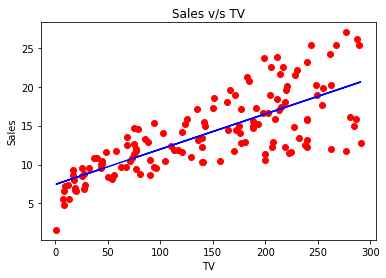

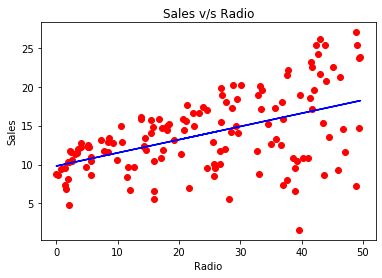

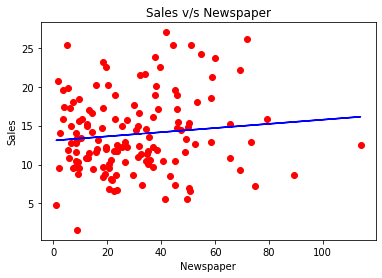

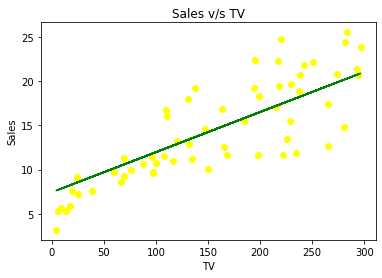

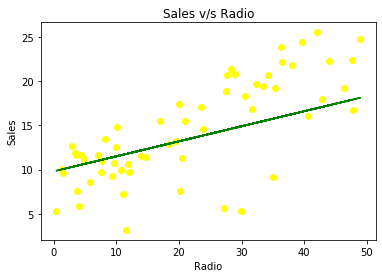

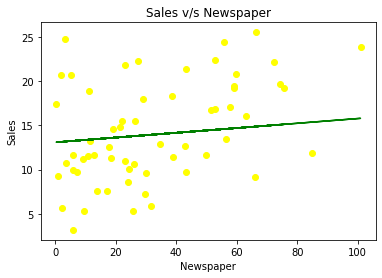

In [18]:
plot_traindata_GD(X_train, y_train, B0, B1)
plot_testdata_GD(X_test, y_test, B0, B1)